#### Importing packages

In [1]:
# Importing the scripts
from webdesign.polls.scripts import preprocess
from webdesign.polls.scripts import categorize
from webdesign.polls.scripts import analyze
from webdesign.polls.scripts import visualize

# Importing other packages
import pandas as pd

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Workflow 

In [2]:
def single_ts_workflow(input_ts,workflow_type,freq,fill_method,smooth_window,cat_method,num_bins,win_size,custom_range=None,title=None):
    pp_ts = preprocess.fill_dates(input_ts,freq) 
    pp_ts = preprocess.fill_values(pp_ts,fill_method)
    pp_ts = preprocess.smoothing(pp_ts,smooth_window)

    if cat_method[0] == 'L':
        cat_ts, bin_bounds = categorize.level_categorize(pp_ts,cat_method,num_bins,custom_range)
    else:
        trend_ts, (cat_ts, bin_bounds) = categorize.trend_categorize(pp_ts,cat_method,win_size,num_bins,custom_range)

    if workflow_type == 'single':
        ### display plots and table only for single time series workflow
        if cat_method[0] == 'L':
            visualize.single_ts_level_plot_nosave(pp_ts,cat_ts,bin_bounds,title)
        else:
            visualize.single_ts_trend_plot_nosave(pp_ts,trend_ts,cat_ts,bin_bounds,title)
        display(analyze.single_ts_analyze(cat_ts,bin_bounds,freq))
    else:
        return cat_ts

### Single Time Series

#### Parameters

In [3]:
### preprocess parameters
fill_method = 'linear'
smooth_window = 7

### categorize parameters
cat_method = 'T-rate'
num_bins = 8
win_size = 14
#custom_range = (0,500)

In [4]:
workflow_type = 'single'
freq = 'D'
input_ts = pd.read_csv('/Users/ajas/NSSAC/PEpiTA/data/va_covid_admissions.csv',parse_dates=['date'])

,category,bin_boundaries,number_of_occurrences,percent_time_spent,average_duration_spent
0,R1,"(-290.29, -217.71)",0,0.0%,0.0
1,R2,"(-217.71, -145.14)",10,1.0%,10.0
2,R3,"(-145.14, -72.57)",32,3.2%,16.0
3,R4,"(-72.57, 0.0)",517,51.65%,24.6
4,R5,"(0.0, 72.57)",422,42.16%,21.1
5,R6,"(72.57, 145.14)",5,0.5%,2.5
6,R7,"(145.14, 217.71)",6,0.6%,3.0
7,R8,"(217.71, 290.29)",9,0.9%,9.0


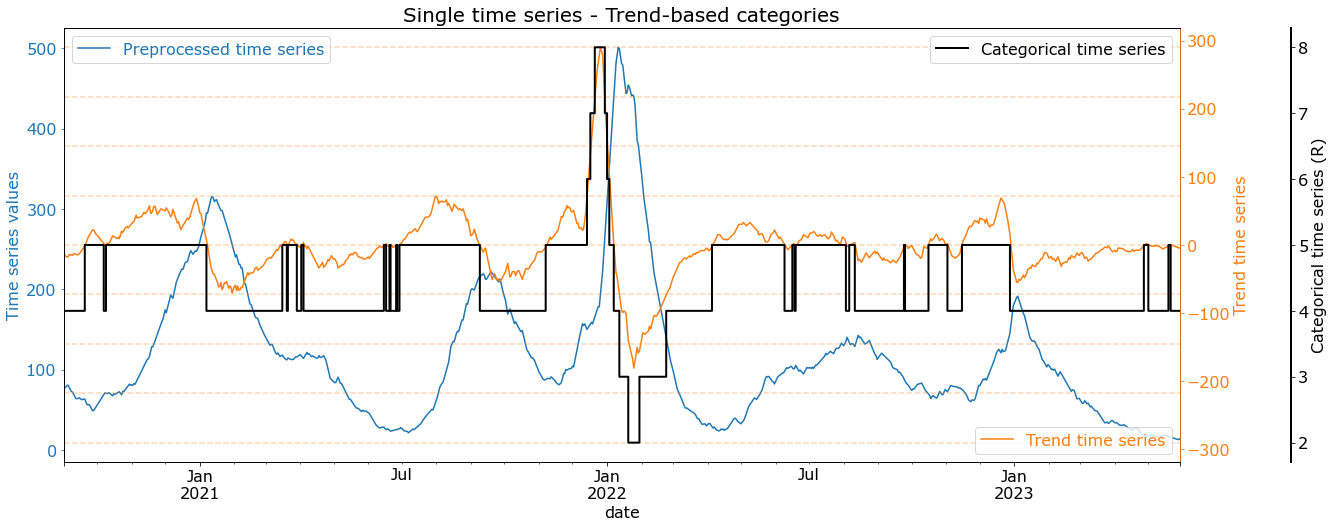

In [5]:
single_ts_workflow(input_ts,workflow_type,freq,fill_method,smooth_window,cat_method,num_bins,win_size)

### Multi Time series(signals)

#### Parameters

In [6]:
### preprocess parameters
fill_method = 'linear'
smooth_window = 7

### categorize parameters
cat_method = 'T-rate'
num_bins = 8
win_size = 14
#custom_range = (0,500)

In [7]:
workflow_type = 'multi-signal'
freq = 'W'
input_df = pd.read_csv('/Users/ajas/NSSAC/PEpiTA/data/va_cases_cli_viralload.csv',parse_dates=['date'],index_col=0)

            cases_reported  cli_visits  viralload
date                                             
2021-09-12         24987.0     26380.0  28.426552
2021-09-19         22092.0     23494.0  28.086507
2021-09-26         19486.0     21279.0  28.239338
2021-10-03         17243.0     19675.0  27.385247
2021-10-10         14071.0     16433.0  27.755509
...                    ...         ...        ...
2023-04-02          2238.0      9291.0  27.521928
2023-04-09          1734.0      8987.0  27.704354
2023-04-16          1631.0      8758.0  27.375865
2023-04-23          1409.0      8548.0  27.417587
2023-04-30          1477.0      8736.0  26.440917

[86 rows x 3 columns]


**cases_reported**

,category,bin_boundaries,number_of_occurrences,percent_time_spent,average_duration_spent
0,R1,"(-69720.29, -52290.21)",6,8.33%,6.0
1,R2,"(-52290.21, -34860.14)",2,2.78%,1.0
2,R3,"(-34860.14, -17430.07)",2,2.78%,1.0
3,R4,"(-17430.07, 0.0)",30,41.67%,6.0
4,R5,"(0.0, 17430.07)",23,31.94%,5.8
5,R6,"(17430.07, 34860.14)",2,2.78%,1.0
6,R7,"(34860.14, 52290.21)",3,4.17%,1.5
7,R8,"(52290.21, 69720.29)",4,5.56%,4.0


            cases_reported  cli_visits  viralload
date                                             
2021-09-12         24987.0     26380.0  28.426552
2021-09-19         22092.0     23494.0  28.086507
2021-09-26         19486.0     21279.0  28.239338
2021-10-03         17243.0     19675.0  27.385247
2021-10-10         14071.0     16433.0  27.755509
...                    ...         ...        ...
2023-04-02          2238.0      9291.0  27.521928
2023-04-09          1734.0      8987.0  27.704354
2023-04-16          1631.0      8758.0  27.375865
2023-04-23          1409.0      8548.0  27.417587
2023-04-30          1477.0      8736.0  26.440917

[86 rows x 3 columns]


**cli_visits**

,category,bin_boundaries,number_of_occurrences,percent_time_spent,average_duration_spent
0,R1,"(-28660.29, -21495.21)",5,6.94%,5.0
1,R2,"(-21495.21, -14330.14)",2,2.78%,1.0
2,R3,"(-14330.14, -7165.07)",9,12.5%,3.0
3,R4,"(-7165.07, 0.0)",16,22.22%,3.2
4,R5,"(0.0, 7165.07)",28,38.89%,5.6
5,R6,"(7165.07, 14330.14)",8,11.11%,2.7
6,R7,"(14330.14, 21495.21)",4,5.56%,4.0
7,R8,"(21495.21, 28660.29)",0,0.0%,0.0


            cases_reported  cli_visits  viralload
date                                             
2021-09-12         24987.0     26380.0  28.426552
2021-09-19         22092.0     23494.0  28.086507
2021-09-26         19486.0     21279.0  28.239338
2021-10-03         17243.0     19675.0  27.385247
2021-10-10         14071.0     16433.0  27.755509
...                    ...         ...        ...
2023-04-02          2238.0      9291.0  27.521928
2023-04-09          1734.0      8987.0  27.704354
2023-04-16          1631.0      8758.0  27.375865
2023-04-23          1409.0      8548.0  27.417587
2023-04-30          1477.0      8736.0  26.440917

[86 rows x 3 columns]


**viralload**

,category,bin_boundaries,number_of_occurrences,percent_time_spent,average_duration_spent
0,R1,"(-2.44, -1.83)",9,12.5%,4.5
1,R2,"(-1.83, -1.22)",5,6.94%,1.7
2,R3,"(-1.22, -0.61)",12,16.67%,3.0
3,R4,"(-0.61, 0.0)",8,11.11%,1.6
4,R5,"(0.0, 0.61)",8,11.11%,1.6
5,R6,"(0.61, 1.22)",9,12.5%,1.5
6,R7,"(1.22, 1.83)",12,16.67%,2.4
7,R8,"(1.83, 2.44)",9,12.5%,4.5


,cases_reported,cli_visits,viralload
2021-09-12,R4,R4,R5
2021-09-19,R5,R5,R6
2021-09-26,R6,R6,R7
2021-10-03,R7,R6,R8
2021-10-10,R7,R7,R8
...,...,...,...
2022-12-25,R4,R3,R2
2023-01-01,R4,R3,R1
2023-01-08,R4,R3,R1
2023-01-15,R4,R3,R1


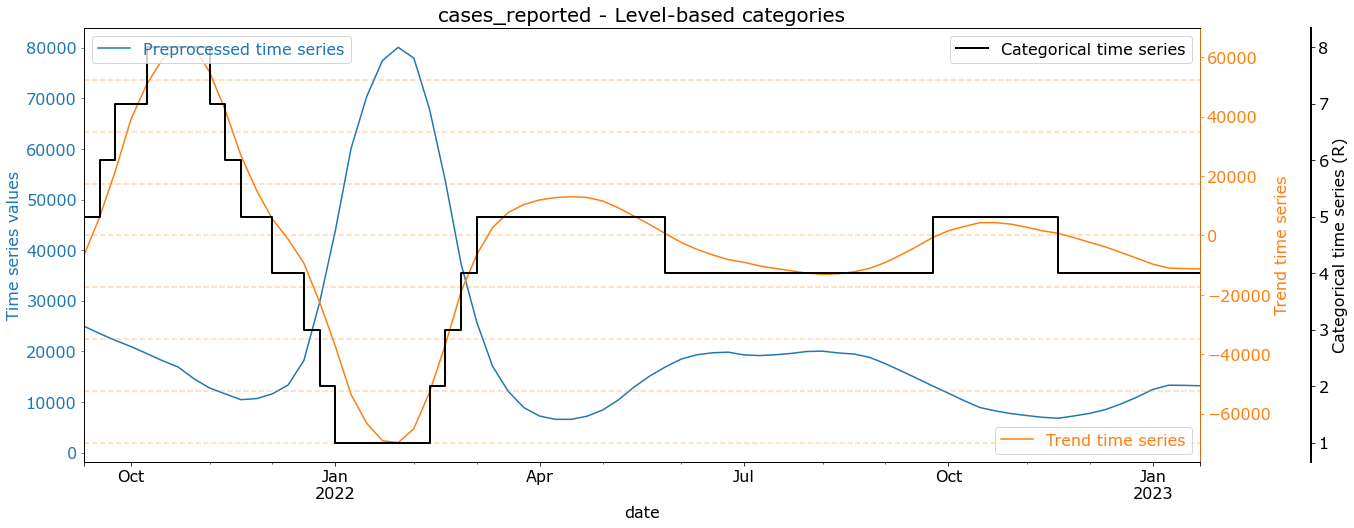

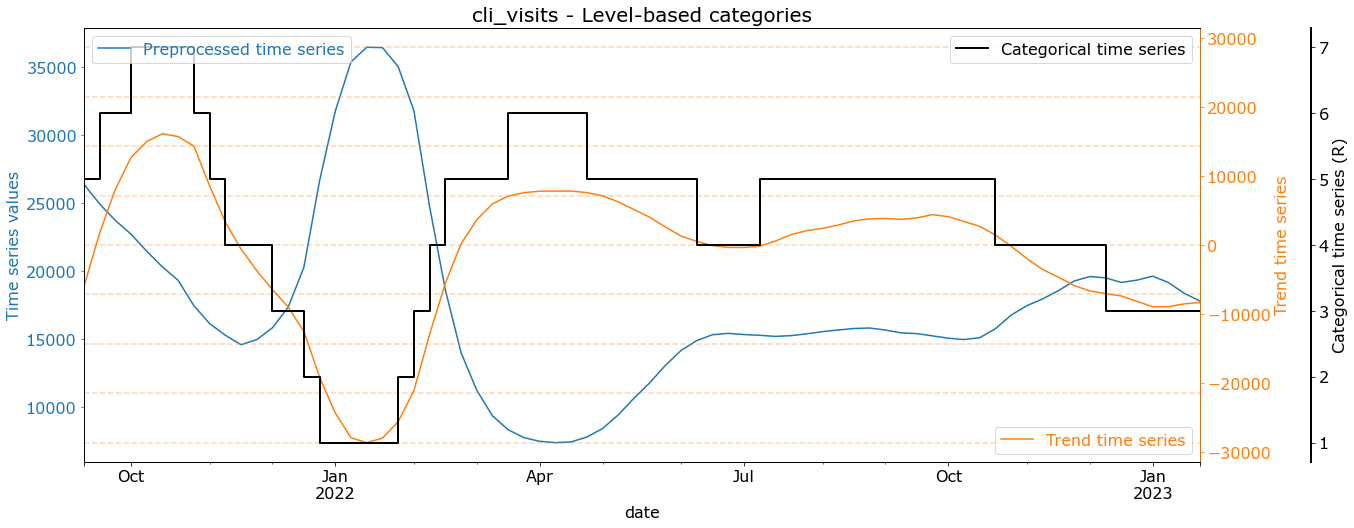

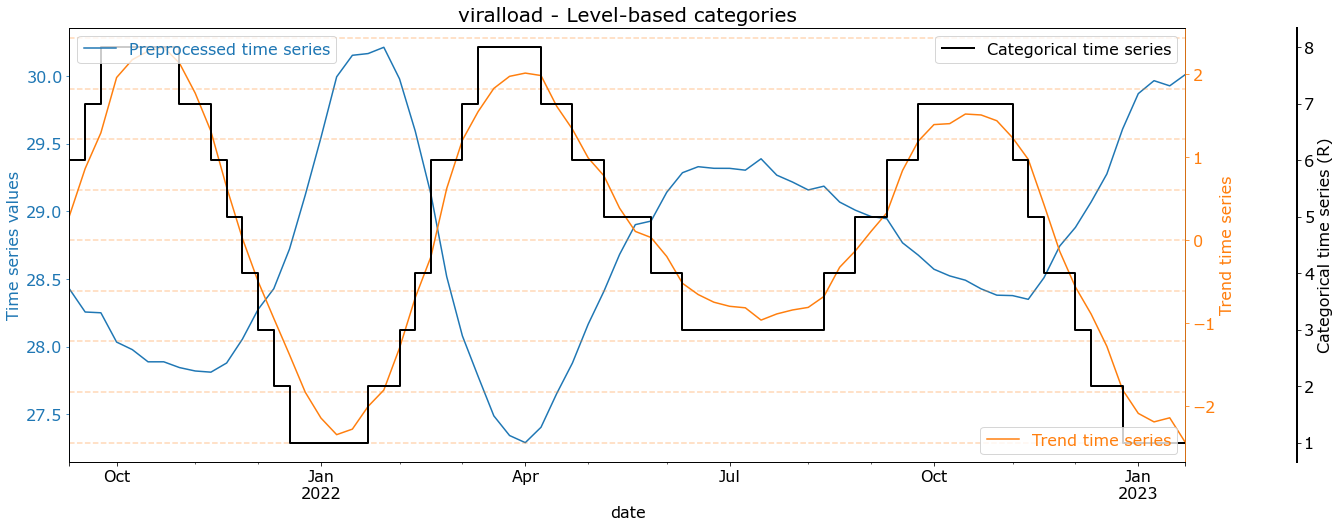

In [8]:
cat_df = pd.DataFrame()
for column in input_df.columns:
    print(input_df)
    signal_ts = input_df[[column]]
    signal_ts.columns = ['value']
    input_ts = signal_ts.reset_index()
    printmd("**"+column+"**")
    single_ts_workflow(input_ts,'single',freq,fill_method,smooth_window,cat_method,num_bins,win_size,title=column)
    cat_ts = single_ts_workflow(input_ts,workflow_type,freq,fill_method,smooth_window,cat_method,num_bins,win_size)
    cat_df = pd.concat([cat_df,cat_ts],axis=1)
cat_df.columns = input_df.columns
cat_df

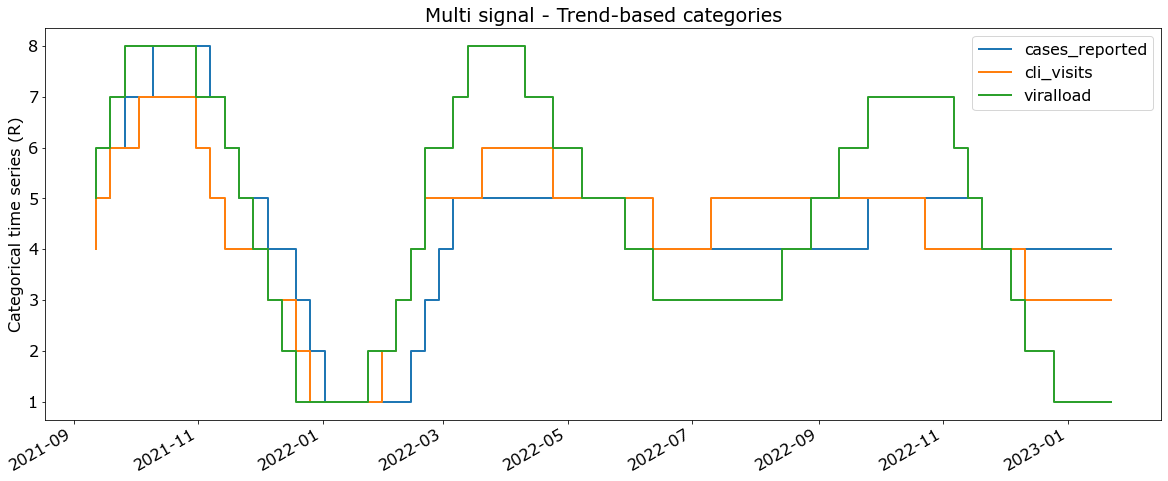

In [9]:
visualize.multi_signal_plot_nosave(cat_df,cat_method)